## Demo

In [69]:
## change your directory to the SuperResolution_Microfluidics folder
import os 
os.chdir('/home/sofiahernandezgelado/Documents/SuperResolution_Microfluidics')

In [17]:
## Run inference using MSRN-BAM 
!python MSRN/test.py
## display the input image
from PIL import Image
hr = Image.open('data/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108.tif')
bicubic = Image.open('data/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_bicubic_x4.tif')
msrn = Image.open('data/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_msrn_x4.tif')

MSRN/checkpoints/pytorch_model_4x.pt
/home/sofiahernandezgelado/Documents/SuperResolution_Microfluidics/MSRN/test.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.as_tensor([lr])


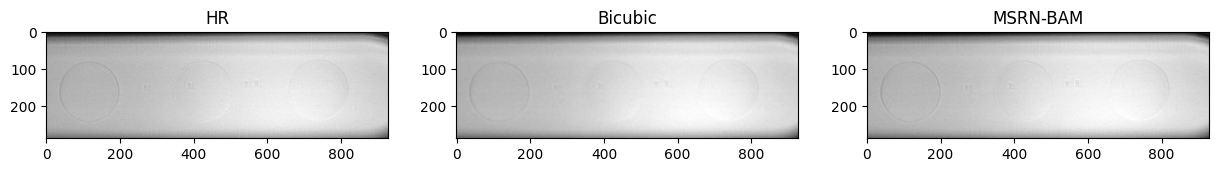

In [18]:
import matplotlib.pyplot as plt
#display images
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(hr, cmap = 'gray')
plt.title('HR')
plt.subplot(1,3,2)
plt.imshow(bicubic, cmap = 'gray')
plt.title('Bicubic')
plt.subplot(1,3,3)
plt.imshow(msrn, cmap = 'gray')
plt.title('MSRN-BAM')
plt.show()

In [ ]:
## There exists two implementation of SAM+CHT the SAM_CHT_analysis.py is used for analysis purposes during the project
## For normal use of SAM+CHT use the SAM_CHT.py

In [81]:
## Run segmentation on the images in the test dataset
!python dropletDetection/SAM_CHT.py --image-folder 'data/test'\
    --depthUm '300'\
    --depthPx '299'

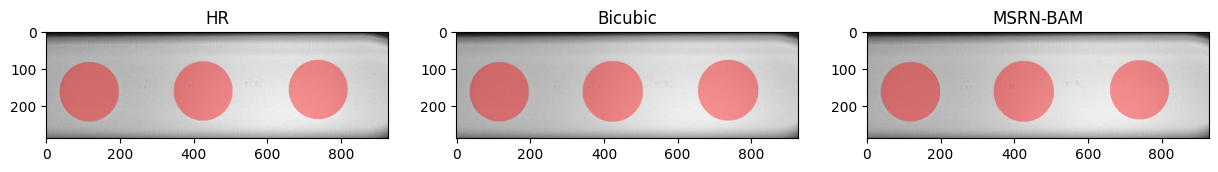

In [82]:
## Display results from segmentation 
hr = Image.open('data/test/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108.tif')
bicubic = Image.open('data/test/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_bicubic_x4.tif')
msrn = Image.open('data/test/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_msrn_x4.tif')
#display images
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(hr)
plt.title('HR')
plt.subplot(1,3,2)
plt.imshow(bicubic)
plt.title('Bicubic')
plt.subplot(1,3,3)
plt.imshow(msrn)
plt.title('MSRN-BAM')
plt.show()

In [83]:
## View results from segmentation 
import pandas as pd
df = pd.read_csv('data/test/SAM_segmentation_metrics.csv')
df

,Image,Diameter,Average Diameter,Number bubbles
0,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 160.53511706 160.53511706],160.535117,3
1,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 164.54849498 164.54849498],163.210702,3
2,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 164.54849498 160.53511706],161.872910,3


In [43]:
## Run DnCNN
os.chdir('/home/sofiahernandezgelado/Documents/SuperResolution_Microfluidics/DnCNN')
!python main_test_dncnn.py\
--model_name 'denoising_sigma_3'\
--testset_name 'test_sigma6'\
--noise_level_img 3\
--show_img False

LogHandlers setup!
23-09-08 18:39:10.544 : Model path: /home/sofiahernandezgelado/Documents/SuperResolution_Microfluidics/DnCNN/model_zoo/denoising_sigma_3.pth
23-09-08 18:39:10.544 : Params number: 557057
23-09-08 18:39:10.544 : model_name:denoising_sigma_3, image sigma:3
23-09-08 18:39:10.544 : testsets/test_sigma6
Figure(640x480)
23-09-08 18:39:11.575 : Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108.tif - PSNR: 37.78 dB; SSIM: 0.8797.
Figure(640x480)
23-09-08 18:39:11.597 : Average PSNR/SSIM(RGB) - test_sigma6_denoising_sigma_3 - PSNR: 37.78 dB Std 0.0; SSIM: 0.8797 Std0.0


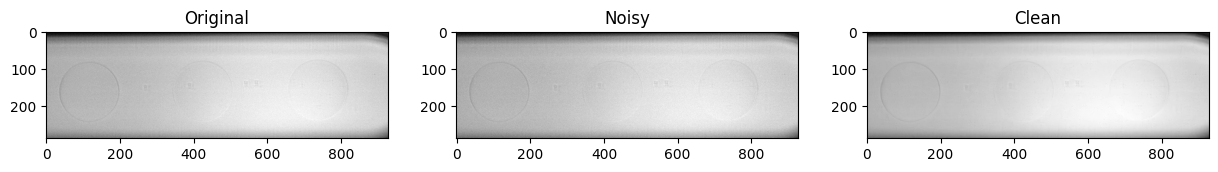

In [44]:
## Display for original noisy and clean
original = Image.open('results/test_sigma6_denoising_sigma_3/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108.tif')
noisy = Image.open('results/test_sigma6_denoising_sigma_3/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_noisy.tif')
clean = Image.open('results/test_sigma6_denoising_sigma_3/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_DnCNN.tif')
#display images
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(original, cmap = 'gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(noisy, cmap = 'gray')
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(clean, cmap = 'gray')
plt.title('Clean')
plt.show()

In [61]:
## Run segmentation on the images in the test dataset
os.chdir('/home/sofiahernandezgelado/Documents/SuperResolution_Microfluidics')
!python dropletDetection/SAM+CHT_any.py --image-folder 'DnCNN/results/test_sigma6_denoising_sigma_3'\
    --depthUm '300'\
    --depthPx '299'\
    --gpu False

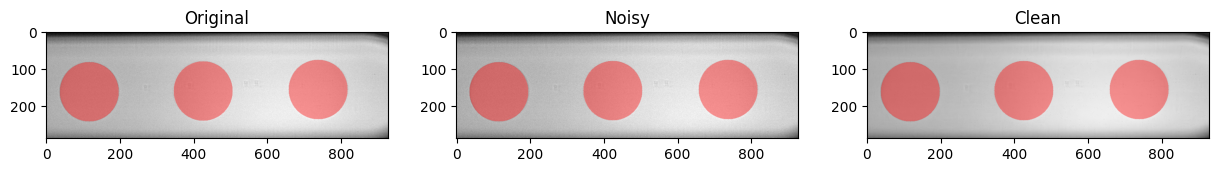

In [63]:
## Display for original noisy and clean
original = Image.open('DnCNN/results/test_sigma6_denoising_sigma_3/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108.tif')
noisy = Image.open('DnCNN/results/test_sigma6_denoising_sigma_3/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_noisy.tif')
clean = Image.open('DnCNN/results/test_sigma6_denoising_sigma_3/SAM+CHT_Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000108_DnCNN.tif')
#display images
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(noisy)
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(clean)
plt.title('Clean')
plt.show()

In [65]:
## View results from segmentation 
import pandas as pd
df = pd.read_csv('DnCNN/results/test_sigma6_denoising_sigma_3/SAM_segmentation_metrics.csv')
df

,Image,Diameter,Average Diameter,Number bubbles
0,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 160.53511706 160.53511706],160.535117,3
1,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 160.53511706 160.53511706],160.535117,3
2,Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img...,[160.53511706 160.53511706 160.53511706],160.535117,3
